In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [167]:
data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train.csv', index_col ='match_id_hash')
target = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
y = y.apply(lambda x: int(x))
data.head()

,positions,r_kills,r_deaths,r_assists,r_denies,r_gold,r_lh,r_xp,r_max_mana,r_stuns,...,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed,log_chat_len,log_game_time
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0.486581,0,1,0,4,2037,25,1991,1490.68891,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.098612,2.079442,0.000000,0.000000,2.484907,5.049856
b9c57c450ce74a2af79c9ce96fac144d,0.712940,16,4,14,28,18172,127,17566,2414.68981,42.060296,...,1.098612,1.386294,0.693147,1.098612,2.639057,2.708050,1.386294,1.098612,2.397895,6.490724
6db558535151ea18ca70a6892197db41,0.614771,0,0,0,0,880,0,0,1670.68912,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.386294,0.693147,0.000000,0.000000,0.000000,3.091042
46a0ddce8f7ed2a8d9bd5edcbb925682,0.616914,6,2,8,43,13348,131,14663,2474.68982,11.397237,...,0.000000,1.945910,0.000000,1.098612,2.639057,2.484907,0.000000,0.000000,1.609438,6.357842
b1b35ff97723d9b7ade1c9c3cf48f770,0.543453,2,4,3,0,8079,62,9762,2364.68977,15.262940,...,0.000000,1.098612,0.000000,0.693147,2.484907,2.197225,0.000000,0.000000,1.386294,6.118097


In [168]:
data['r_gold_sq'] = data['r_gold'].apply(lambda x: x**2)
data['d_gold_sq'] = data['d_gold'].apply(lambda x: x**2)

In [169]:
# smaller dataset

col_to_drop = ['r_deaths', 'd_deaths'] 
cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base','r_firstblood_claimed','d_firstblood_claimed']
num_feats = [col for col in data.columns if col not in cat_feats]

In [137]:
# determine the columns of the numerical data for further normalization
first_blood_claimed = ['r{}_firstblood_claimed'.format(x) for x in range(1,6)]+['d{}_firstblood_claimed'.format(x) for x in range(1,6)]+['r_firstblood_claimed','d_firstblood_claimed']
cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base']+first_blood_claimed
num_feats = [col for col in data.columns if col not in cat_feats]
# numerical

In [170]:
numerical_columns =[]
for j in range(len(data.columns)):
    if data.columns[j] in num_feats:
        numerical_columns.append(j)

In [171]:
from sklearn.model_selection import train_test_split

X = data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=150)

In [172]:
X_train.shape

(27772, 77)

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    (OneHotEncoder(),cat_feats))


# scaler = StandardScaler()
# X_train[:,numerical_columns] = scaler.fit_transform(X_train[:,numerical_columns])
# X_test[:,numerical_columns] = scaler.transform(X_test[:,numerical_columns])


In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score


logreg = LogisticRegression(C = 0.0001,penalty = 'l2',random_state = 50 )
pipe = make_pipeline(preprocess, logreg)



In [217]:
cv_pred = cross_val_predict(pipe, 
                             X_train, 
                             y_train, 
                             cv=5,
                             method="predict_proba")
print("Cross validation AUC {:.4f}".format(roc_auc_score(y_train, cv_pred[:,1])))

Cross validation AUC 0.8970


In [218]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['positions', 'r_kills', 'r_deaths', 'r_assists', 'r_denies', 'r_..., penalty='l2', random_state=50,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [219]:
predicted = pipe.predict(X_test)
print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test,predicted))

0.7131815508695287
0.70894359808951


In [220]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['positions', 'r_kills', 'r_deaths', 'r_assists', 'r_denies', 'r_..., penalty='l2', random_state=50,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

Text(0.5, 0, 'coefficinets of regression')

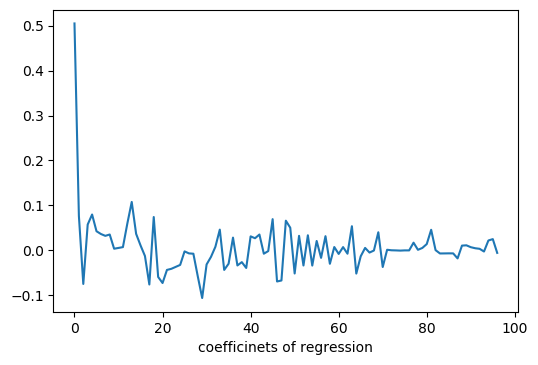

In [221]:
c = logreg.coef_
plt.plot(c[0])
plt.xlabel('coefficinets of regression')

In [222]:
test_data = data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test.csv', index_col ='match_id_hash')

In [223]:
test_data['r_gold_sq'] = test_data['r_gold'].apply(lambda x: x**2)
test_data['d_gold_sq'] = test_data['d_gold'].apply(lambda x: x**2)

In [224]:
test_data.shape

(10000, 77)

In [225]:
X_sub = test_data
# X_sub[:,numerical_columns] = scaler.transform(X_sub[:,numerical_columns])

In [226]:
y_test_pred = pipe.predict_proba(X_sub)[:, 1]

In [227]:
y_test_pred

array([0.52419796, 0.87133209, 0.75645381, ..., 0.49385077, 0.79829933,
       0.22362423])

In [228]:


df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred}, 
                                 index=test_data.index)

In [229]:
import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

Submission saved to submission_2019-11-08_20-28-36.csv


In [230]:
df_submission.head(10)


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.524198
70e5ba30f367cea48793b9003fab9d38,0.871332
4d9ef74d3a2025d79e9423105fd73d41,0.756454
2bb79e0c1eaac1608e5a09c8e0c6a555,0.597384
bec17f099b01d67edc82dfb5ce735a43,0.506539
038acbb47d9eb54c11962d07cce8d829,0.218430
b891f03bb2a86d78b84043437fc95e04,0.846944
ff898afdb5bb5c7163bde45a009503f7,0.113243
72e6b1c31c718c0806f9aaeb8b7290a9,0.492546


In [111]:
df_submission.shape

(10000, 1)